In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle

## Loading Synthetic Data

In [2]:
data1 = pd.DataFrame()

file_path = 'synth_renders/invalid_floorplans.txt'

with open(file_path, 'r') as file:
    content_list = file.read().splitlines()

data1['key'] = content_list
data1['label'] = 0

def image_path(key):
    return f"synth_renders/invalid_floorplans/{key}"

data1['image_path'] = data1['key'].apply(image_path)

data1

,key,label,image_path
0,006a2d3bb2b7435fb6d96e7f320efe42_wout_0_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
1,006a2d3bb2b7435fb6d96e7f320efe42_wout_10_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
2,006a2d3bb2b7435fb6d96e7f320efe42_wout_11_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
3,006a2d3bb2b7435fb6d96e7f320efe42_wout_12_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
4,006a2d3bb2b7435fb6d96e7f320efe42_wout_13_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
...,...,...,...
645,1c0e78764f794b88922ea3e511446274_wout_5_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...
646,1c0e78764f794b88922ea3e511446274_wout_6_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...
647,1c0e78764f794b88922ea3e511446274_wout_7_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...
648,1c0e78764f794b88922ea3e511446274_wout_8_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...


In [3]:
data2 = pd.DataFrame()

file_path = 'synth_renders/valid_floorplans.txt'

with open(file_path, 'r') as file:
    content_list = file.read().splitlines()

data2['key'] = content_list
data2['label'] = 1

def image_path(key):
    return f"synth_renders/valid_floorplans/{key}"

data2['image_path'] = data2['key'].apply(image_path)

data2

,key,label,image_path
0,006a2d3bb2b7435fb6d96e7f320efe42_wout_1_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
1,006a2d3bb2b7435fb6d96e7f320efe42_wout_27_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
2,006a2d3bb2b7435fb6d96e7f320efe42_wout_2_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
3,006a2d3bb2b7435fb6d96e7f320efe42_wout_44_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
4,006a2d3bb2b7435fb6d96e7f320efe42_wout_48_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
...,...,...,...
640,bfb7f53ccc0242588a8f6898e502d10f_wout_6_Top.png,1,synth_renders/valid_floorplans/bfb7f53ccc02425...
641,bfb7f53ccc0242588a8f6898e502d10f_wout_7_Top.png,1,synth_renders/valid_floorplans/bfb7f53ccc02425...
642,bfc0d80669bf40fd9c001975e31c56ce_wout_0_Top.png,1,synth_renders/valid_floorplans/bfc0d80669bf40f...
643,bfc0d80669bf40fd9c001975e31c56ce_wout_1_Top.png,1,synth_renders/valid_floorplans/bfc0d80669bf40f...


In [4]:
data = pd.concat([data1, data2], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data 

,key,label,image_path
0,01c1ac1113dc4770a2690dc9e7218859_wout_16_Top.png,1,synth_renders/valid_floorplans/01c1ac1113dc477...
1,03ce3a320471444f9258505270f12002_wout_1_Top.png,0,synth_renders/invalid_floorplans/03ce3a3204714...
2,bfc0d80669bf40fd9c001975e31c56ce_wout_2_Top.png,1,synth_renders/valid_floorplans/bfc0d80669bf40f...
3,118e326a8dea480d80369a9c9d88eeb3_wout_7_Top.png,0,synth_renders/invalid_floorplans/118e326a8dea4...
4,3ef8723922e94b65bb200cfa7baf5d0b_wout_16_Top.png,1,synth_renders/valid_floorplans/3ef8723922e94b6...
...,...,...,...
1290,05b8e14c1cbc48f3b50491c0597f3e28_wout_31_Top.png,0,synth_renders/invalid_floorplans/05b8e14c1cbc4...
1291,1bad7affe06c42788ec433197efd2c40_wout_16_Top.png,0,synth_renders/invalid_floorplans/1bad7affe06c4...
1292,180722ee3fb649519d8b6d79271bdc25_wout_7_Top.png,0,synth_renders/invalid_floorplans/180722ee3fb64...
1293,63a17b60623c4e5e84361e06a61b8f3d_wout_2_Top.png,1,synth_renders/valid_floorplans/63a17b60623c4e5...


In [5]:
data['image'] = data['image_path'].map(lambda x: np.asarray(Image.open(x).resize((224,224)).convert('RGB'))) 

In [6]:
data['image'] = [arr.astype(np.int16) for arr in data['image']]

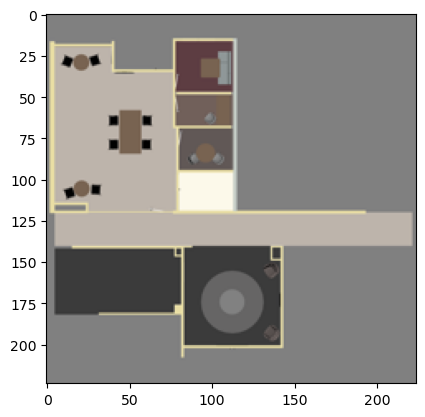

In [7]:
plt.imshow(data.image[24])

## VGG19 Model

In [8]:
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from tqdm import tqdm

In [9]:
base_model = VGG19(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

In [10]:
def get_embedding(model, pil_img):
    if pil_img.size != (224, 224):
        pil_img = pil_img.resize((224, 224))
    img_data = np.array(pil_img)
    img_data = preprocess_input(img_data)

    embedding_vector = model.predict(np.expand_dims(img_data, axis=0))

    embedding_vector_flatten = embedding_vector.flatten()
    return embedding_vector_flatten

def process_images(image_list, model, batch_size=32):
    embeddings = []
    
    for i in tqdm(range(0, len(image_list), batch_size)):
        batch = image_list[i:i+batch_size]
        batch_images = [np.array(img) for img in batch]
        batch_images = np.array(batch_images)
        batch_images = preprocess_input(batch_images)
        
        batch_embeddings = model.predict(batch_images)
    
        for embedding in batch_embeddings:
            embeddings.append(embedding.flatten())
    
    return embeddings

## Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
ADG_im = list(data.image)
ADG_lb = list(data.label)

In [15]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_arrays = np.array([np.array(img) for img in data['image']])

batch_size = 32
augmented_generator = datagen.flow(
    x=image_arrays,
    y=data.label,  
    batch_size=batch_size,
    shuffle=True, 
)

num_samples = len(data) 

num_batches = num_samples // batch_size
for kl in range(num_batches):
    batch_images, batch_labels = augmented_generator.next()
    for i in range(batch_size):
        
        ADG_im.append(batch_images[i])
        ADG_lb.append(batch_labels[i])

In [16]:
ADG_im = np.asarray(ADG_im)

In [18]:
embeddings = process_images(ADG_im, model, batch_size=32)

  0%|                                                   | 0/121 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  1%|▎                                          | 1/121 [00:02<05:00,  2.50s/it]

1/1 [==============================] - 2s 2s/step


  2%|▋                                          | 2/121 [00:04<04:49,  2.43s/it]

1/1 [==============================] - 2s 2s/step


  2%|█                                          | 3/121 [00:07<04:44,  2.41s/it]

1/1 [==============================] - 2s 2s/step


  3%|█▍                                         | 4/121 [00:09<04:40,  2.40s/it]

1/1 [==============================] - 2s 2s/step


  4%|█▊                                         | 5/121 [00:12<04:37,  2.39s/it]

1/1 [==============================] - 2s 2s/step


  5%|██▏                                        | 6/121 [00:14<04:36,  2.40s/it]

1/1 [==============================] - 2s 2s/step


  6%|██▍                                        | 7/121 [00:16<04:36,  2.43s/it]

1/1 [==============================] - 2s 2s/step


  7%|██▊                                        | 8/121 [00:19<04:37,  2.45s/it]

1/1 [==============================] - 3s 3s/step


  7%|███▏                                       | 9/121 [00:21<04:37,  2.48s/it]

1/1 [==============================] - 3s 3s/step


  8%|███▍                                      | 10/121 [00:24<04:39,  2.52s/it]

1/1 [==============================] - 3s 3s/step


  9%|███▊                                      | 11/121 [00:27<04:38,  2.53s/it]

1/1 [==============================] - 3s 3s/step


 10%|████▏                                     | 12/121 [00:29<04:38,  2.56s/it]

1/1 [==============================] - 3s 3s/step


 11%|████▌                                     | 13/121 [00:32<04:41,  2.60s/it]

1/1 [==============================] - 3s 3s/step


 12%|████▊                                     | 14/121 [00:35<04:41,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 12%|█████▏                                    | 15/121 [00:37<04:40,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 13%|█████▌                                    | 16/121 [00:40<04:38,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 14%|█████▉                                    | 17/121 [00:43<04:37,  2.67s/it]

1/1 [==============================] - 3s 3s/step


 15%|██████▏                                   | 18/121 [00:45<04:35,  2.67s/it]

1/1 [==============================] - 3s 3s/step


 16%|██████▌                                   | 19/121 [00:48<04:31,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 17%|██████▉                                   | 20/121 [00:51<04:28,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 17%|███████▎                                  | 21/121 [00:53<04:24,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 18%|███████▋                                  | 22/121 [00:56<04:21,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 19%|███████▉                                  | 23/121 [00:59<04:18,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 20%|████████▎                                 | 24/121 [01:01<04:16,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 21%|████████▋                                 | 25/121 [01:04<04:14,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 21%|█████████                                 | 26/121 [01:07<04:12,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 22%|█████████▎                                | 27/121 [01:09<04:11,  2.68s/it]

1/1 [==============================] - 3s 3s/step


 23%|█████████▋                                | 28/121 [01:12<04:08,  2.68s/it]

1/1 [==============================] - 3s 3s/step


 24%|██████████                                | 29/121 [01:15<04:05,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 25%|██████████▍                               | 30/121 [01:17<04:01,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 26%|██████████▊                               | 31/121 [01:20<03:58,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 26%|███████████                               | 32/121 [01:23<03:55,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 27%|███████████▍                              | 33/121 [01:25<03:52,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 28%|███████████▊                              | 34/121 [01:28<03:49,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 29%|████████████▏                             | 35/121 [01:30<03:46,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 30%|████████████▍                             | 36/121 [01:33<03:44,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 31%|████████████▊                             | 37/121 [01:36<03:41,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 31%|█████████████▏                            | 38/121 [01:38<03:38,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 32%|█████████████▌                            | 39/121 [01:41<03:36,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 33%|█████████████▉                            | 40/121 [01:44<03:32,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 34%|██████████████▏                           | 41/121 [01:46<03:30,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 35%|██████████████▌                           | 42/121 [01:49<03:27,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 36%|██████████████▉                           | 43/121 [01:51<03:24,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 36%|███████████████▎                          | 44/121 [01:54<03:22,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 37%|███████████████▌                          | 45/121 [01:57<03:22,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 38%|███████████████▉                          | 46/121 [01:59<03:19,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 39%|████████████████▎                         | 47/121 [02:02<03:16,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 40%|████████████████▋                         | 48/121 [02:05<03:15,  2.68s/it]

1/1 [==============================] - 3s 3s/step


 40%|█████████████████                         | 49/121 [02:08<03:13,  2.69s/it]

1/1 [==============================] - 3s 3s/step


 41%|█████████████████▎                        | 50/121 [02:10<03:10,  2.68s/it]

1/1 [==============================] - 3s 3s/step


 42%|█████████████████▋                        | 51/121 [02:13<03:06,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 43%|██████████████████                        | 52/121 [02:15<03:02,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 44%|██████████████████▍                       | 53/121 [02:18<02:59,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 45%|██████████████████▋                       | 54/121 [02:21<02:56,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 45%|███████████████████                       | 55/121 [02:23<02:53,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 46%|███████████████████▍                      | 56/121 [02:26<02:51,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 47%|███████████████████▊                      | 57/121 [02:29<02:48,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 48%|████████████████████▏                     | 58/121 [02:31<02:45,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 49%|████████████████████▍                     | 59/121 [02:34<02:42,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 50%|████████████████████▊                     | 60/121 [02:36<02:40,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 50%|█████████████████████▏                    | 61/121 [02:39<02:38,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 51%|█████████████████████▌                    | 62/121 [02:42<02:35,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 52%|█████████████████████▊                    | 63/121 [02:44<02:32,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 53%|██████████████████████▏                   | 64/121 [02:47<02:30,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 54%|██████████████████████▌                   | 65/121 [02:50<02:27,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 55%|██████████████████████▉                   | 66/121 [02:52<02:24,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 55%|███████████████████████▎                  | 67/121 [02:55<02:22,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 56%|███████████████████████▌                  | 68/121 [02:58<02:19,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 57%|███████████████████████▉                  | 69/121 [03:00<02:16,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 58%|████████████████████████▎                 | 70/121 [03:03<02:14,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 59%|████████████████████████▋                 | 71/121 [03:05<02:11,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 60%|████████████████████████▉                 | 72/121 [03:08<02:09,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 60%|█████████████████████████▎                | 73/121 [03:11<02:06,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 61%|█████████████████████████▋                | 74/121 [03:13<02:03,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 62%|██████████████████████████                | 75/121 [03:16<02:00,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 63%|██████████████████████████▍               | 76/121 [03:19<01:58,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 64%|██████████████████████████▋               | 77/121 [03:21<01:55,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 64%|███████████████████████████               | 78/121 [03:24<01:53,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 65%|███████████████████████████▍              | 79/121 [03:26<01:50,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 66%|███████████████████████████▊              | 80/121 [03:29<01:47,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 67%|████████████████████████████              | 81/121 [03:32<01:45,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 68%|████████████████████████████▍             | 82/121 [03:34<01:42,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 69%|████████████████████████████▊             | 83/121 [03:37<01:39,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 69%|█████████████████████████████▏            | 84/121 [03:40<01:37,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 70%|█████████████████████████████▌            | 85/121 [03:42<01:34,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 71%|█████████████████████████████▊            | 86/121 [03:45<01:31,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 72%|██████████████████████████████▏           | 87/121 [03:47<01:29,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 73%|██████████████████████████████▌           | 88/121 [03:50<01:26,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 74%|██████████████████████████████▉           | 89/121 [03:53<01:24,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 74%|███████████████████████████████▏          | 90/121 [03:55<01:21,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 75%|███████████████████████████████▌          | 91/121 [03:58<01:18,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 76%|███████████████████████████████▉          | 92/121 [04:01<01:16,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 77%|████████████████████████████████▎         | 93/121 [04:03<01:13,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 78%|████████████████████████████████▋         | 94/121 [04:06<01:10,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 79%|████████████████████████████████▉         | 95/121 [04:08<01:08,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 79%|█████████████████████████████████▎        | 96/121 [04:11<01:05,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 80%|█████████████████████████████████▋        | 97/121 [04:14<01:03,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 81%|██████████████████████████████████        | 98/121 [04:16<01:00,  2.64s/it]

1/1 [==============================] - 3s 3s/step


 82%|██████████████████████████████████▎       | 99/121 [04:19<00:57,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 83%|█████████████████████████████████▉       | 100/121 [04:22<00:55,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 83%|██████████████████████████████████▏      | 101/121 [04:24<00:52,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 84%|██████████████████████████████████▌      | 102/121 [04:27<00:49,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 85%|██████████████████████████████████▉      | 103/121 [04:30<00:47,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 86%|███████████████████████████████████▏     | 104/121 [04:32<00:44,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 87%|███████████████████████████████████▌     | 105/121 [04:35<00:42,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 88%|███████████████████████████████████▉     | 106/121 [04:37<00:39,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 88%|████████████████████████████████████▎    | 107/121 [04:40<00:36,  2.62s/it]

1/1 [==============================] - 3s 3s/step


 89%|████████████████████████████████████▌    | 108/121 [04:43<00:34,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 90%|████████████████████████████████████▉    | 109/121 [04:45<00:31,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 91%|█████████████████████████████████████▎   | 110/121 [04:48<00:28,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 92%|█████████████████████████████████████▌   | 111/121 [04:51<00:26,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 93%|█████████████████████████████████████▉   | 112/121 [04:53<00:23,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 93%|██████████████████████████████████████▎  | 113/121 [04:56<00:21,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 94%|██████████████████████████████████████▋  | 114/121 [04:58<00:18,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 95%|██████████████████████████████████████▉  | 115/121 [05:01<00:15,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 96%|███████████████████████████████████████▎ | 116/121 [05:04<00:13,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 97%|███████████████████████████████████████▋ | 117/121 [05:06<00:10,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 98%|███████████████████████████████████████▉ | 118/121 [05:09<00:07,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 98%|████████████████████████████████████████▎| 119/121 [05:12<00:05,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 99%|████████████████████████████████████████▋| 120/121 [05:14<00:02,  2.64s/it]

1/1 [==============================] - 2s 2s/step


100%|█████████████████████████████████████████| 121/121 [05:17<00:00,  2.62s/it]


## KNN Classifier

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [21]:
embeddings = np.array(embeddings)
label_int = np.array(ADG_lb)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, label_int, test_size=0.2, random_state=42)

In [31]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       404
           1       0.94      0.86      0.89       370

    accuracy                           0.90       774
   macro avg       0.91      0.90      0.90       774
weighted avg       0.91      0.90      0.90       774

Accuracy: 0.9031007751937985


## XGBoost Classifier

In [32]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       404
           1       0.90      0.89      0.90       370

    accuracy                           0.90       774
   macro avg       0.90      0.90      0.90       774
weighted avg       0.90      0.90      0.90       774

Accuracy: 0.9031007751937985


## FFN 

In [37]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(label_int)

labels_categorical = to_categorical(labels_encoded) 

X_train1, X_test1, y_train1, y_test1 = train_test_split(embeddings, labels_categorical, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train1.shape[1], activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(y_train1.shape[1], activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',               
              metrics=['accuracy'])

history = model.fit(X_train1, y_train1, epochs=50, batch_size=16, verbose=1, validation_split=0.1)

scores = model.evaluate(X_test1, y_test1, verbose=0)
y_pred = model.predict(X_test1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test1, axis=1)

print(classification_report(y_true_classes, y_pred_classes))
print(f"Accuracy: {scores[1]}")

Epoch 1/50
175/175 [==============================] - 1s 3ms/step - loss: 1.2044 - accuracy: 0.6569 - val_loss: 0.8890 - val_accuracy: 0.6516
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6813 - val_loss: 0.7958 - val_accuracy: 0.6065
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.6913 - val_loss: 0.5800 - val_accuracy: 0.6194
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.6967 - val_loss: 0.5059 - val_accuracy: 0.6806
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.6981 - val_loss: 0.5432 - val_accuracy: 0.6226
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7358 - val_loss: 0.4392 - val_accuracy: 0.8516
Epoch 7/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7627 - val_loss: 0.4744 - val_accuracy: 0.6194
Epoch 

## Lasso Feature Selection

In [197]:
from sklearn.linear_model import Lasso

alpha = 0.01 
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train1, y_train1)
klp = lasso_model.predict(X_test1)

/Users/harishneelam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.769e-01, tolerance: 2.590e-02
  model = cd_fast.enet_coordinate_descent(


In [198]:
Lasso_features = []
for i in X_train1:
    Lasso_features.append(np.array(i[lasso_model.coef_[0] != 0]))
Lasso_features = np.array(Lasso_features)

Lasso_x_test_features = []
for i in X_test1:
    Lasso_x_test_features.append(np.array(i[lasso_model.coef_[0] != 0]))
Lasso_x_test_features = np.array(Lasso_x_test_features)

In [199]:
print(f'{len(X_train[0])},{len(Lasso_features[0])}')

25088,247


0.9420849420849421
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       127
           1       0.95      0.93      0.94       132

   micro avg       0.94      0.94      0.94       259
   macro avg       0.94      0.94      0.94       259
weighted avg       0.94      0.94      0.94       259
 samples avg       0.94      0.94      0.94       259



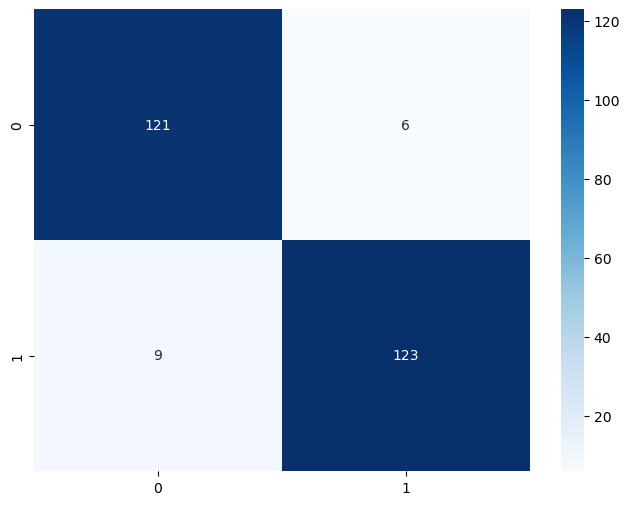

In [200]:
knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(Lasso_features, y_train1)
y_pred = knn_model.predict(Lasso_x_test_features)
print(accuracy_score(y_test1, y_pred))
print(classification_report(y_test1,y_pred))

cm = confusion_matrix(np.argmax(y_test1, axis=1), np.argmax(y_pred, axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [201]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(Lasso_features, y_train1)

y_pred = xgb_clf.predict(Lasso_x_test_features)

print(classification_report(y_test1, y_pred))
print(f"Accuracy: {accuracy_score(y_test1, y_pred)}")

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       127
           1       0.93      0.95      0.94       132

   micro avg       0.93      0.93      0.93       259
   macro avg       0.93      0.93      0.93       259
weighted avg       0.93      0.93      0.93       259
 samples avg       0.93      0.93      0.93       259

Accuracy: 0.9343629343629344


In [207]:
encoder = LabelEncoder()

labels = np.concatenate([y_train1, y_test1], axis=0) 

features = np.concatenate([Lasso_features, Lasso_x_test_features], axis=0)  



X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train2.shape[1], activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(y_train2.shape[1], activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',               
              metrics=['accuracy'])

history = model.fit(X_train2, y_train2, epochs=50, batch_size=128, verbose=1, validation_split=0.2)

scores = model.evaluate(X_test2, y_test2, verbose=0)
y_pred = model.predict(X_test2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test2, axis=1)

print(classification_report(y_true_classes, y_pred_classes))
print(f"Accuracy: {scores[1]}")

Epoch 1/50
7/7 [==============================] - 0s 9ms/step - loss: 4.0702 - accuracy: 0.5676 - val_loss: 0.6309 - val_accuracy: 0.8846
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.9203 - val_loss: 0.5818 - val_accuracy: 0.9087
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.9396 - val_loss: 0.1352 - val_accuracy: 0.9615
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9312 - val_loss: 0.2317 - val_accuracy: 0.9519
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9638 - val_loss: 0.1636 - val_accuracy: 0.9567
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9481 - val_loss: 0.1504 - val_accuracy: 0.9567
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9686 - val_loss: 0.1133 - val_accuracy: 0.9519
Epoch 8/50
7/7 [==================